In [52]:
import numpy as np

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
rand = np.random.randn(*x.shape)
z = 2*x + 20*y# + rand

In [53]:
def model(x, y, w1, w2):
    return w1*x + w2*y

w1 = 5
w2 = 5
output = model(x, y, w1, w2)

In [54]:
def loss(x, y, z, w1, w2):
    return ((z-model(x, y, w1, w2))**2).mean()

error = loss(x, y, z, w1, w2)
error

4824.242424242424

Text(0.5, 0, 'loss')

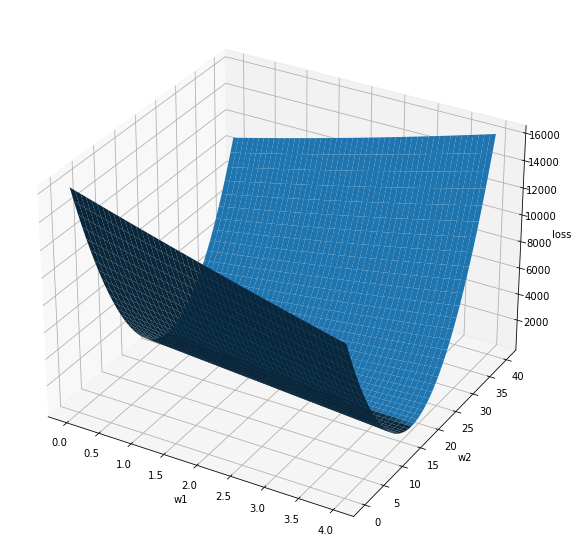

In [55]:
import matplotlib.pyplot as plt

# Se crea la figura
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Se crean los datos para representar\n",
N = 50
w1_min = 0
w1_max = 4
w2_min = 0
w2_max = 40
posibles_w1 = np.linspace(w1_min, w1_max, N)
posibles_w2 = np.linspace(w2_min, w2_max, N)
W1, W2 = np.meshgrid(posibles_w1, posibles_w2)
def LOSS(x, y, output, W1, W2):
    L = np.empty((len(W1), len(W1)))
    Z = np.empty((len(W1), len(W2), len(x)))

    for i in range(len(W1)):
        for j in range(len(W2)):
            L[i, j] = loss(x, y, z, W1[i, j], W2[i, j])
    return L
Z = LOSS(x, y, output, W1, W2)

# Se termina de configurar la figura
ax.plot_surface(W1, W2, Z)
# ax.scatter(w1, w2, error, color='red')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
# ax.set_zlim(0, 1000)
ax.set_zlabel('loss')

In [56]:
def gradiente_w1(z, x, y, w1, w2):
    return 2*((model(x, y, w1, w2-z)*x).mean())

def gradiente_w2(z, x, y, w1, w2):
    return 2*((model(x, y, w1, w2-z)*y).mean())

In [58]:
lr = 1e-7
steps = 10000
w1 = 1
w2 = 100
output = model(x, y, w1, w2)
error = loss(x, y, z, w1, w2)

print(f"w1: {w1:.2f}, w2: {w2:.2f}, error: {error:.2f}")

for i in range(steps):
    dl_w1 = gradiente_w1(z, x, y, w1, w2)
    dl_w2 = gradiente_w2(z, x, y, w1, w2)

    w1 = w1 - lr*dl_w1
    w2 = w2 - lr*dl_w2
    error = loss(x, y, z, w1, w2)

    if (i+1)%10 == 0:
        print(f"i={i+1}: error={error}, w1={w1}, w2={w2}")

w1: 1.00, w2: 100.00, error: 209084.01
i=10: error=209129.99196032019, w1=1.0043435091105744, w2=100.00434350911057
i=20: error=209175.97608002013, w1=1.0086864361967778, w2=100.00868643619675
i=30: error=209221.9590919003, w1=1.0130287813366003, w2=100.01302878133657
i=40: error=209267.94099475458, w1=1.0173705446080217, w2=100.01737054460799
i=50: error=209313.9217873778, w1=1.0217117260890118, w2=100.02171172608898
i=60: error=209359.9014685649, w1=1.0260523258575298, w2=100.0260523258575
i=70: error=209405.8800371116, w1=1.0303923439915246, w2=100.03039234399152
i=80: error=209451.85749181404, w1=1.0347317805689342, w2=100.03473178056893
i=90: error=209497.83383146903, w1=1.0390706356676866, w2=100.0390706356677
i=100: error=209543.8090548735, w1=1.0434089093656989, w2=100.0434089093657
i=110: error=209589.78316082543, w1=1.0477466017408783, w2=100.04774660174087
i=120: error=209635.75614812318, w1=1.0520837128711207, w2=100.05208371287111
i=130: error=209681.7280155655, w1=1.05642

In [32]:
x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)

In [33]:
x = (x - x_mean)/x_std
y = (y - y_mean)/y_std
z = 2*x + 2*y + rand

In [34]:
w1 = 1
w2 = 1
output = model(x, y, w1, w2)

In [36]:
error = loss(x, y, z, w1, w2)
error

5.275562826830534

Text(0.5, 0, 'loss')

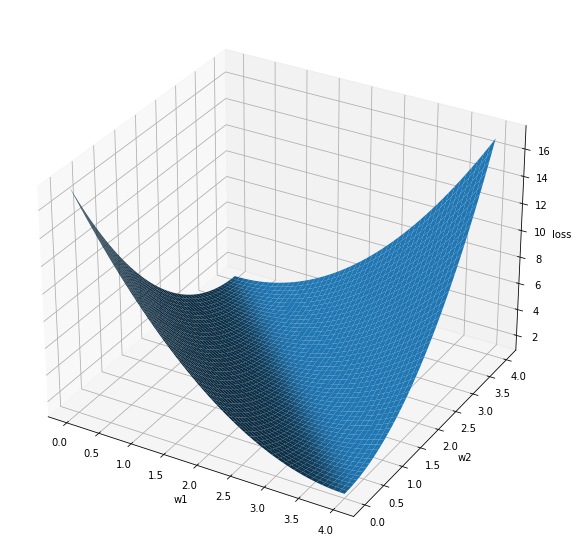

In [37]:
# Se crea la figura
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Se crean los datos para representar\n",
N = 50
w1_min = 0
w1_max = 4
w2_min = 0
w2_max = 4
posibles_w1 = np.linspace(w1_min, w1_max, N)
posibles_w2 = np.linspace(w2_min, w2_max, N)
W1, W2 = np.meshgrid(posibles_w1, posibles_w2)
def LOSS(x, y, output, W1, W2):
    L = np.empty((len(W1), len(W1)))
    Z = np.empty((len(W1), len(W2), len(x)))

    for i in range(len(W1)):
        for j in range(len(W2)):
            L[i, j] = loss(x, y, z, W1[i, j], W2[i, j])
    return L
Z = LOSS(x, y, output, W1, W2)

# Se termina de configurar la figura
ax.plot_surface(W1, W2, Z)
# ax.scatter(w1, w2, error, color='red')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
# ax.set_zlim(0, 1000)
ax.set_zlabel('loss')

In [38]:
lr = 1e-3
steps = 1000

w1 = 1
w2 = 10
output = model(x, y, w1, w2)

for i in range(steps):
    dl_w1 = gradiente_w1(z, x, y, w1, w2)
    dl_w2 = gradiente_w2(z, x, y, w1, w2)

    w1 = w1 - lr*dl_w1
    w2 = w2 - lr*dl_w2
    output = model(x, y, w1, w2)
    error = loss(x, y, z, w1, w2)

    if (i+1)%10 == 0:
        print(f"i={i+1}: error={error}, w1={w1}, w2={w2}")

i=10: error=46.163378345695556, w1=0.8628852172949942, w2=9.862885217294995
i=20: error=42.69941397386287, w1=0.731157348960146, w2=9.731157348960151
i=30: error=39.502284788951286, w1=0.604604755915708, w2=9.604604755915712
i=40: error=36.55143601344693, w1=0.483024113879051, w2=9.483024113879052
i=50: error=33.82789624001849, w1=0.36622008669601863, w2=9.366220086696018
i=60: error=31.314155461764408, w1=0.25400501250632085, w2=9.254005012506322
i=70: error=28.994052498001462, w1=0.14619860223874234, w2=9.146198602238746
i=80: error=26.852671091840552, w1=0.042627649951759244, w2=9.042627649951761
i=90: error=24.87624401154649, w1=-0.05687424544581455, w2=8.943125754554185
i=100: error=23.052064539136314, w1=-0.15246694754124604, w2=8.847533052458756
i=110: error=21.368404777164386, w1=-0.2443040392608951, w2=8.755695960739107
i=120: error=19.814440248477933, w1=-0.3325330696224744, w2=8.667466930377529
i=130: error=18.380180304184098, w1=-0.4172957907929988, w2=8.582704209207009
i=1